## Логистическая регрессия

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Реализуйте обучение логистической регрессии с $L^1$ и $L^2$ регуляризацией с помощью метода Stochastic Gradient Descent (SGD)

#### Замечания
* В SGD градиент расчитывается по одному случайному объекту
* Для отладки работы алгоритма, реализуйте возможность сохранения или вывода ошибки модели после очередной итерации
* Правило останова - максимальное количество эпох
    
Эпохой в SGD и MB-SGD называется один проход по **всем** объектам в выборке (тем или иным способом)

# Реализация модели

In [99]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    """
    Предполагается, что в выборке всегда 2 класса
    """

    def __init__(self, C=1, alpha=0.01, max_epoch=10, penalty='l2'):
        """
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        """

        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.penalty = penalty
        self.theta = np.random.randn(3, 1)
        self.losses = np.zeros(self.max_epoch)

    def fit(self, X, y=None):
        """
        Обучение модели
        """

        X_b = np.hstack((np.ones((X.shape[0], 1)), X))
        m = len(X)
        errors = np.zeros(m)

        for e in range(self.max_epoch):
            p = np.random.permutation(m)
                
            for idx in p:
                xi = X_b[[idx], :]
                yi = y[idx]
                y_pr = 1 / (1 + np.exp(xi.dot(self.theta)))
                gradient = xi.T.dot(y_pr - yi)
                
                if self.penalty == 'l1':
                    reg_grad = self.C * np.sign(self.theta)
                else:
                    reg_grad = self.C * self.theta

                self.theta = self.theta - self.alpha * (gradient + reg_grad)
                errors[e] = -(yi * np.log(y_pr) + (1 - yi) * np.log(1 - y_pr))
                
            if self.penalty == 'l1':
                reg_cost = self.C * np.sum(np.abs(self.theta))
            else:
                reg_cost = self.C * np.sum(self.theta ** 2)
                
            self.losses[e] = 1 / m * np.sum(errors) + reg_cost

        return self

    def partial_fit(self, X, y=None):
        """
        По желанию - метод дообучения модели на новых данных
        """

        return self

    def predict(self, X):
        """
        Возвращение метки класса
        """

        return np.sign(X.dot(self.theta))

    def predict_proba(self, X):
        """
        Возвращение вероятности каждого из классов
        """
        
        return 1 / (1 + np.exp(-(X.dot(self.theta))))

## Проверка на синтетических данных (2 балл)

Запустите ваш алгоритм на синтетических данных. 
Выведите полученные веса и нарисуйте разделяющую границу между классами.

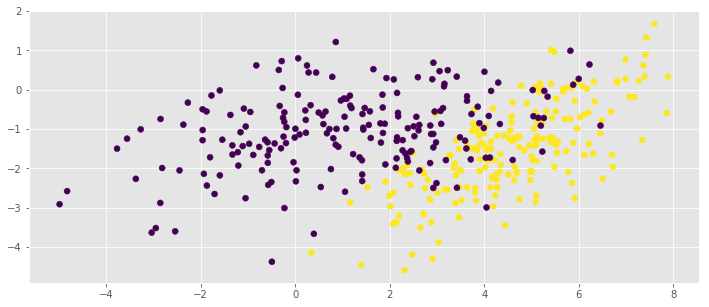

In [100]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

plt.scatter(X[:,0], X[:,1], c=y)

In [101]:
model = MySGDClassifier()
model.fit(X, y)

MySGDClassifier(C=1, alpha=0.01, max_epoch=10, penalty='l2')

In [102]:
model.theta

array([[ 0.38450118],
       [ 2.50407667],
       [-0.62405239]])

(-5.579296238869098, 2.676141863312651)

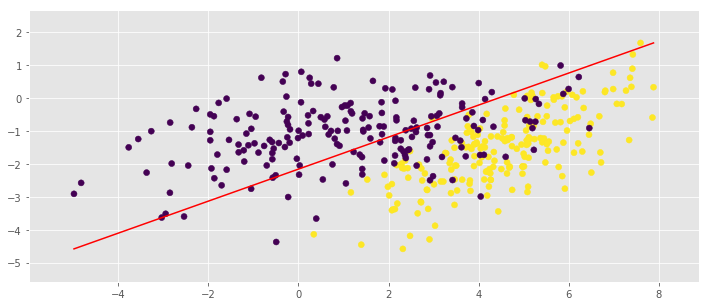

In [103]:
x_naive = np.array([X[:, 0].min(), X[:, 0].max()])
y_naive = np.array([X[:, 1].min(), X[:, 1].max()])

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y)
ax.plot(x_naive, y_naive, c='r')
ax.set_xlim(x_naive[0] - 1, x_naive[1] + 1)
ax.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

## Анализ сходимости

Покажите сходимость вашего метода: изобразите графики зависимости значения функции потерь (по всей выборке) после очередной итерации/эпохи (выбрать одно) для разных `alpha`.

/Users/andrejpopov/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/Users/andrejpopov/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply


Text(0,0.5,'Losses')

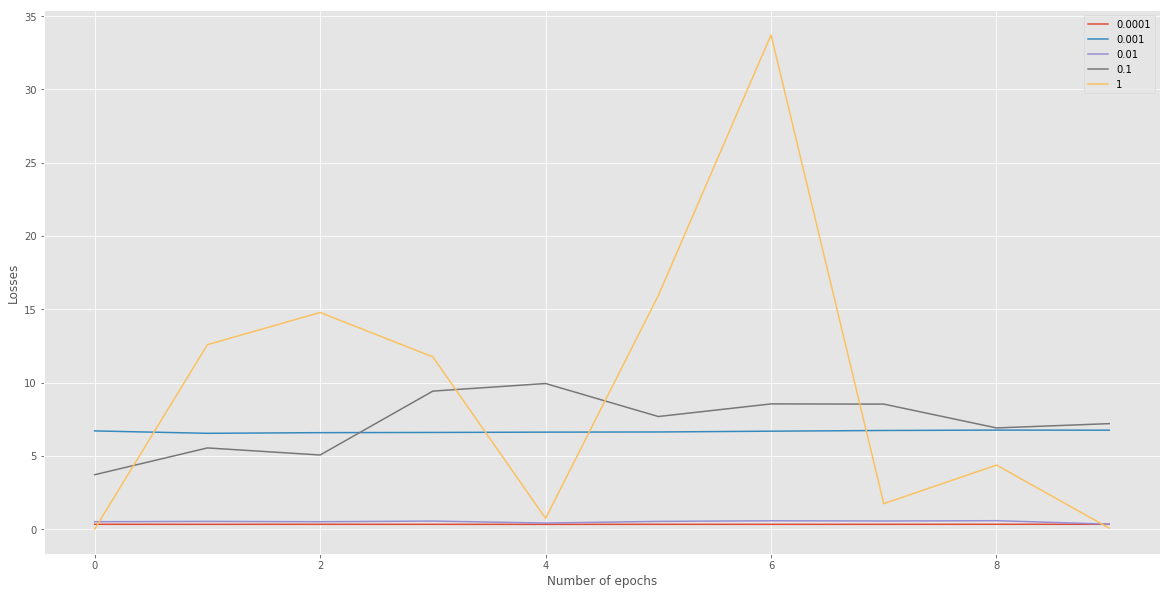

In [104]:
alpha = [0.0001, 0.001, 0.01, 0.1, 1]
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

for a in alpha:
    model = MySGDClassifier(alpha=a)
    model.fit(X, y)
    plt.plot(range(model.max_epoch), model.losses)
    
ax.legend(alpha)
ax.set_xlabel('Number of epochs')
ax.set_ylabel('Losses')